<center><b><span style='font-size:26px'>Tech Tectonics: Unraveling the Growth and Transformations of Tech Industry Pioneers (2020-2023)</span></b></center>


<center><b><span style='font-size:26px'>Tech Tectonics: Unraveling the Growth and Transformations of Tech Industry Pioneers (2020-2023)</span></b></center>


<span style='font-size:20px;'>**Objectives:** Identify the growths and transformations of top ranked tech companies within a span of four years[20220-2023]</span>


<span style='font-size:20px;'>**Techniques:** Web Scraping for Data collection, Data Visualization and Data Analysis</span>

<span style='font-size:20px;'>**Sources:** Wikipedia</span>

<span style='font-size:20px;'>**2023 Rank List:**</span>

<span style='font-size:20px;'>**Step 1: Import Libraries**</span>


In [14]:
from bs4 import BeautifulSoup
import requests

<span style='font-size:20px;'>**Step 2: Get URL Address**</span>


In [15]:
url='https://en.wikipedia.org/wiki/List_of_largest_technology_companies_by_revenue'
page=requests.get(url)
soup=BeautifulSoup(page.text,'html')


<span style='font-size:20px;'>**Step 3: Locate the specific table containing the desired list**</span>

In [16]:
table=soup.find_all('table')[1]



<span style='font-size:20px;'>**Step 4: Extract the table column headers**</span>




In [17]:
table_columns=table.find_all('th')
#print(table_columns)



<span style='font-size:20px;'>**Step 4b : Extract and clean the table column headers**</span>

In [18]:
table_list=[col.text.strip() for col in table_columns]
#print(table_list)



<span style='font-size:20px;'>**Step 5: Find all rows within the table** </span>


In [19]:
find_row=table.find_all('tr')


<span style='font-size:20px;'>**Step 6: Extract and clean the data from the table rows, and create a DataFrame**</span>

In [20]:
import pandas as pd

# Define an empty list to store row data
data_rows = []

# Initialize a variable to hold the number of columns
num_columns = 0

# Assuming the second column contains country logos
for row in find_row:
    row_data = row.find_all('td')

    # Skip the second column (index 1) if it contains logos
    individual_row_data = [data.text.strip() for idx, data in enumerate(row_data) if idx != 1]

    if num_columns == 0:
        num_columns = len(individual_row_data)

    # Ensure that individual_row_data has the same number of columns
    individual_row_data = individual_row_data[:num_columns]

    # Append the data to the list
    data_rows.append(individual_row_data)
custom_column_names = ["Rank", "Company", "Revenue[USD $Billions]", "Employee", "Revenue per Employee", "Headquarters"] 


# Convert the list of data to a DataFrame with custom column names
df = pd.DataFrame(data_rows, columns=custom_column_names)

# Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)


<span style='font-size:20px;'>**Step 6b: Display The DataFrame**</span>

In [21]:
df

,Rank,Company,Revenue[USD $Billions],Employee,Revenue per Employee,Headquarters
0,None,None,None,None,None,None
1,1,Apple,$383.93,"147,000",1867.44897,"Cupertino, California, US"
2,2,Samsung Electronics,$200.734,"267,937",749.18357,"Suwon, South Korea"
3,3,Alphabet,$182.527,"135,301",1349.04398,"Mountain View, California, US"
4,4,Foxconn,$181.945,"878,429",207.12544,"New Taipei City, Taiwan"
5,5,Microsoft,$143.015,"163,000",877.39263,"Redmond, Washington, US"
6,6,Huawei,$129.184,"197,000",655.75634,"Shenzhen, China"
7,7,Dell Technologies,$92.224,"158,000",583.6962,"Round Rock, Texas, US"
8,8,Meta,$85.965,"58,604",1466.87939,"Menlo Park, California, US"
9,9,Sony,$84.893,"109,700",773.86508,"Tokyo, Japan"


<span style='font-size:20px;'>**Step 6C: Remove the first row from the DataFrame**</span>


In [22]:
df.drop(0, axis=0, inplace=True)

<span style='font-size:20px;'>**Step 6D: Display The DataFrame**</span>


In [23]:
df

,Rank,Company,Revenue[USD $Billions],Employee,Revenue per Employee,Headquarters
1,1,Apple,$383.93,"147,000",1867.44897,"Cupertino, California, US"
2,2,Samsung Electronics,$200.734,"267,937",749.18357,"Suwon, South Korea"
3,3,Alphabet,$182.527,"135,301",1349.04398,"Mountain View, California, US"
4,4,Foxconn,$181.945,"878,429",207.12544,"New Taipei City, Taiwan"
5,5,Microsoft,$143.015,"163,000",877.39263,"Redmond, Washington, US"
6,6,Huawei,$129.184,"197,000",655.75634,"Shenzhen, China"
7,7,Dell Technologies,$92.224,"158,000",583.6962,"Round Rock, Texas, US"
8,8,Meta,$85.965,"58,604",1466.87939,"Menlo Park, California, US"
9,9,Sony,$84.893,"109,700",773.86508,"Tokyo, Japan"
10,10,Hitachi,$82.345,"350,864",234.69207,"Tokyo, Japan"


<span style='font-size:20px;'>**Step 7: Save The DataFrame To a CSV_file** </span>

In [24]:
df.to_csv("2023_Ranking_Tech.csv", index=False)

<span style='font-size:20px;'>**Step 8: Data Visualization**</span>

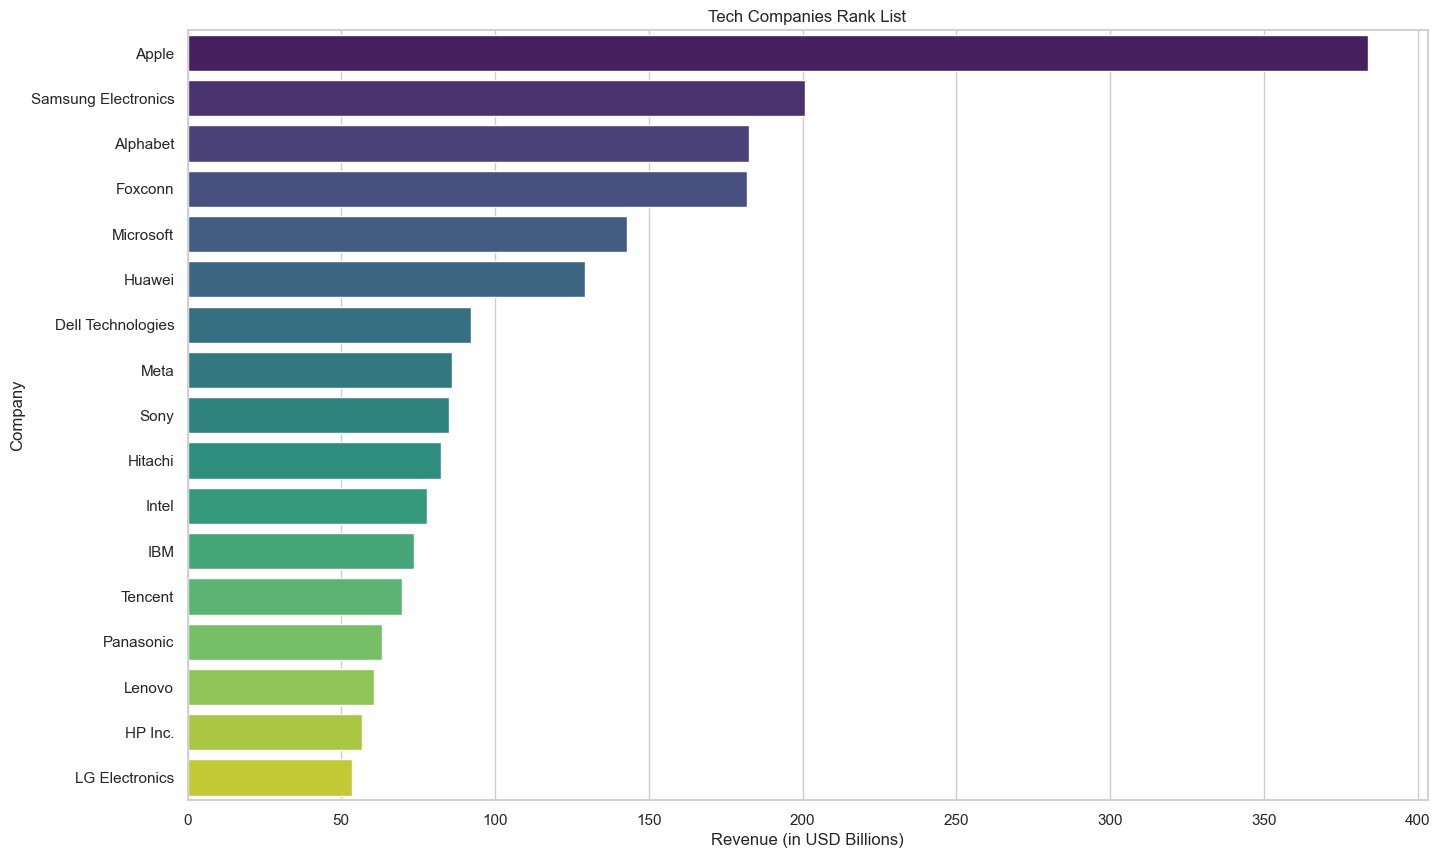

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove non-numeric characters from the 'Revenue[USD $Billions]' column
df['Revenue[USD $Billions]'] = df['Revenue[USD $Billions]'].str.replace('[\$,]', '', regex=True).astype(float)

# Set the style of the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(16, 10))

# Create a horizontal bar plot
sns.barplot(x='Revenue[USD $Billions]', y='Company', data=df, palette="viridis")

# Customize labels and title
plt.xlabel('Revenue (in USD Billions)')
plt.ylabel('Company')
plt.title('Tech Companies Rank List')

# Show the horizontal bar chart
plt.show()
